In [50]:
import numpy as np
import pandas as pd
3
import re
import string

from unidecode import unidecode
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
obitos = pd.read_csv('obitos2019-2023df.csv', sep=';')
obitos

,i_ano_obito,i_cid_cap,i_cid_capitulo,i_cid_obito,i_desc_cbo,i_desc_cid_obito,i_desc_local_obito,i_desc_raca_cor,i_desc_radf_res,i_desc_regiao_saude_estab,...,i_desc_sigla_estab_cnes,i_desc_tipo_obito,i_desc_tipo_violencia,i_desc_uf_res,i_faixa_etaria,i_idade_anos,i_mes_obito,i_qtd_obitos,i_sexo,id
0,2019,IX,Capítulo IX - Doenças do aparelho circulatório,I461,Pedreiro,"Morte súbita (de origem) cardíaca, descrita de...",Domicílio,Parda,Samambaia,Não Informado,...,Não Informado,não fetal,Não Informado,DF,75_79_anos,78.0,4,1,Masculino,6741108
1,2019,XVII,"Capítulo XVII - Malformações congênitas, defor...",Q430,Psicólogo clínico,Divertículo de Meckel,Hospital,Branca,Plano Piloto,Privado,...,Hosp Sta Helena,não fetal,Não Informado,DF,80_+_anos,84.0,4,1,Masculino,6741059
2,2019,XI,Capítulo XI - Doenças do aparelho digestivo,K746,Trabalhador volante da agricultura,Outras formas de cirrose hepática e as não esp...,Hospital,Parda,Ceilândia,Região Central,...,HRAN,não fetal,Não Informado,DF,75_79_anos,77.0,4,1,Feminino,6741156
3,2019,II,Capítulo II - Neoplasias [tumores],C762,Não Informado,Neoplasia maligna do abdome,Hospital,Branca,Sobradinho II,Região Norte,...,HRS,não fetal,Não Informado,DF,80_+_anos,81.0,4,1,Feminino,6741168
4,2019,II,Capítulo II - Neoplasias [tumores],C349,Não Informado,"Neoplasia maligna dos brônquios ou pulmões, nã...",Hospital,Preta,Gama,Região Sul,...,HRG,não fetal,Não Informado,DF,80_+_anos,84.0,4,1,Feminino,6741207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89870,2023,II,Capítulo II - Neoplasias [tumores],C56,Administrador,Neoplasia maligna do ovário,Hospital,Branca,Santa Maria,Privado,...,Hosp Sta Luzia,não fetal,Não Informado,DF,35_39_anos,37.0,9,1,Feminino,6858285
89871,2023,IV,"Capítulo IV - Doenças endócrinas, nutricionais...",E149,Motorista de carro de passeio,Diabetes mellitus não especificado - sem compl...,Hospital,Branca,Cruzeiro,Contratado/Credenciado,...,Hosp. São Mateus,não fetal,Não Informado,DF,80_+_anos,85.0,9,1,Masculino,6857976
89872,2023,XI,Capítulo XI - Doenças do aparelho digestivo,K703,Não Informado,Cirrose hepática alcoólica,Outro Estab de Saúde,Branca,Vicente Pires,Região Sudoeste,...,UPA Vicente Pires,não fetal,Não Informado,DF,65_69_anos,65.0,9,1,Masculino,6858081
89873,2023,XVIII,"Capítulo XVIII - Sintomas, sinais e achados an...",R99,Não Informado,Outras causas mal definidas e as não especific...,Hospital,Não Informado,Planaltina,Região Norte,...,HRPL,não fetal,Não Informado,DF,00_<_1_ano,0.0,9,1,Masculino,6858090


In [23]:
obitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89875 entries, 0 to 89874
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   i_ano_obito                89875 non-null  int64  
 1   i_cid_cap                  89872 non-null  object 
 2   i_cid_capitulo             89872 non-null  object 
 3   i_cid_obito                89875 non-null  object 
 4   i_desc_cbo                 89875 non-null  object 
 5   i_desc_cid_obito           89875 non-null  object 
 6   i_desc_local_obito         89875 non-null  object 
 7   i_desc_raca_cor            89875 non-null  object 
 8   i_desc_radf_res            89835 non-null  object 
 9   i_desc_regiao_saude_estab  89875 non-null  object 
 10  i_desc_regiao_saude_res    89422 non-null  object 
 11  i_desc_sigla_estab_cnes    89875 non-null  object 
 12  i_desc_tipo_obito          89875 non-null  object 
 13  i_desc_tipo_violencia      89875 non-null  obj

# exercício 3

### excluíndo colunas desnecessárias para a analise.

In [24]:
obitos = obitos.drop('id', axis=1)
obitos.drop('i_qtd_obitos', axis=1, inplace=True)
obitos.drop('i_cid_cap', axis=1, inplace=True)
obitos.drop('i_desc_cbo', axis=1, inplace=True)
obitos.drop('i_desc_tipo_obito', axis=1, inplace=True)
obitos.drop('i_cid_capitulo', axis=1, inplace=True)
obitos.drop('i_cid_obito', axis=1, inplace=True)
obitos.drop('i_desc_cid_obito', axis=1, inplace=True)

In [25]:
obitos

,i_ano_obito,i_desc_local_obito,i_desc_raca_cor,i_desc_radf_res,i_desc_regiao_saude_estab,i_desc_regiao_saude_res,i_desc_sigla_estab_cnes,i_desc_tipo_violencia,i_desc_uf_res,i_faixa_etaria,i_idade_anos,i_mes_obito,i_sexo
0,2019,Domicílio,Parda,Samambaia,Não Informado,Região Sudoeste,Não Informado,Não Informado,DF,75_79_anos,78.0,4,Masculino
1,2019,Hospital,Branca,Plano Piloto,Privado,Região Central,Hosp Sta Helena,Não Informado,DF,80_+_anos,84.0,4,Masculino
2,2019,Hospital,Parda,Ceilândia,Região Central,Região Oeste,HRAN,Não Informado,DF,75_79_anos,77.0,4,Feminino
3,2019,Hospital,Branca,Sobradinho II,Região Norte,Região Norte,HRS,Não Informado,DF,80_+_anos,81.0,4,Feminino
4,2019,Hospital,Preta,Gama,Região Sul,Região Sul,HRG,Não Informado,DF,80_+_anos,84.0,4,Feminino
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89870,2023,Hospital,Branca,Santa Maria,Privado,Região Sul,Hosp Sta Luzia,Não Informado,DF,35_39_anos,37.0,9,Feminino
89871,2023,Hospital,Branca,Cruzeiro,Contratado/Credenciado,Região Central,Hosp. São Mateus,Não Informado,DF,80_+_anos,85.0,9,Masculino
89872,2023,Outro Estab de Saúde,Branca,Vicente Pires,Região Sudoeste,Região Sudoeste,UPA Vicente Pires,Não Informado,DF,65_69_anos,65.0,9,Masculino
89873,2023,Hospital,Não Informado,Planaltina,Região Norte,Região Norte,HRPL,Não Informado,DF,00_<_1_ano,0.0,9,Masculino


In [26]:
obitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89875 entries, 0 to 89874
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   i_ano_obito                89875 non-null  int64  
 1   i_desc_local_obito         89875 non-null  object 
 2   i_desc_raca_cor            89875 non-null  object 
 3   i_desc_radf_res            89835 non-null  object 
 4   i_desc_regiao_saude_estab  89875 non-null  object 
 5   i_desc_regiao_saude_res    89422 non-null  object 
 6   i_desc_sigla_estab_cnes    89875 non-null  object 
 7   i_desc_tipo_violencia      89875 non-null  object 
 8   i_desc_uf_res              89875 non-null  object 
 9   i_faixa_etaria             89875 non-null  object 
 10  i_idade_anos               87089 non-null  float64
 11  i_mes_obito                89875 non-null  int64  
 12  i_sexo                     89875 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usa

In [27]:
obitos.isnull().sum()

i_ano_obito                     0
i_desc_local_obito              0
i_desc_raca_cor                 0
i_desc_radf_res                40
i_desc_regiao_saude_estab       0
i_desc_regiao_saude_res       453
i_desc_sigla_estab_cnes         0
i_desc_tipo_violencia           0
i_desc_uf_res                   0
i_faixa_etaria                  0
i_idade_anos                 2786
i_mes_obito                     0
i_sexo                          0
dtype: int64

## retirada dos dados nulos

### Foram retirados todos os nulos, pois não afetaria a análise do dataset pela quantidade de dados.

In [28]:
obitos.dropna(inplace=True)

In [29]:
obitos.isnull().sum()

i_ano_obito                  0
i_desc_local_obito           0
i_desc_raca_cor              0
i_desc_radf_res              0
i_desc_regiao_saude_estab    0
i_desc_regiao_saude_res      0
i_desc_sigla_estab_cnes      0
i_desc_tipo_violencia        0
i_desc_uf_res                0
i_faixa_etaria               0
i_idade_anos                 0
i_mes_obito                  0
i_sexo                       0
dtype: int64

## anotações

In [30]:
obitos.i_desc_tipo_violencia.value_counts()

Não Informado    78517
Acidente          4051
Homicídio         2027
Suicídio          1089
Ignorado           873
Outros             143
Name: i_desc_tipo_violencia, dtype: int64

## Analise preditiva

### Modelo de Regressão Logística

Importar bibliotecas de machine learning e funções importantes para a construçãod o modelo

In [31]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoders = {}
for column in obitos.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    obitos[column] = le.fit_transform(obitos[column])
    label_encoders[column] = le

Label encoding é uma técnica de codificação de rótulos para converter colunas categóricas em numéricas em um DataFrame chamado `obitos`. 
O LabelEncoder é uma classe do `sklearn.preprocessing` que pode transformar rótulos categóricos em números.

> `label_encoders = {}` inicializa um dicionário vazio chamado `label_encoders`. Este dicionário será usado para armazenar os codificadores de rótulos (LabelEncoders) para cada coluna, para que possamos reverter a codificação mais tarde, se necessário.

> Em seguinda, é feito um loop sobre cada coluna no DataFrame `obitos` que tem o tipo de dados 'object' (comum em strings).

> `le = LabelEncoder()`: cria um novo codificador de rótulos. 

> `obitos[column] = le.fit_transform(obitos[column])`:  ajusta o codificador de rótulos à coluna atual e, em seguida, transforma os rótulos categóricos na coluna em números. Os números são atribuídos aos rótulos na ordem em que aparecem (por exemplo, o primeiro rótulo único que o codificador vê será codificado como 0, o segundo como 1, e assim por diante).

> `label_encoders[column] = le`: Isso armazena o codificador de rótulos para a coluna atual no dicionário `label_encoders`. A chave é o nome da coluna e o valor é o codificador de rótulos.


In [116]:
if 'i_sexo' not in obitos.columns:
    raise KeyError("A coluna 'i_sexo' não foi encontrada no DataFrame.")

X = obitos.drop('i_sexo', axis=1)
y = obitos['i_sexo']

In [117]:
X = obitos.drop('i_idade_anos', axis=1)
y = obitos['i_idade_anos']

Dividir em treino e teste

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, train_size=1000, random_state=42)

Treinando o modelo

In [119]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

A mensagem na caixa vermelha é um aviso de que o algoritmo de otimização (neste caso, ‘lbfgs’) usado pelo modelo de Regressão Logística do sklearn não conseguiu convergir, ou seja, não conseguiu encontrar uma solução ótima dentro do número máximo de iterações permitidas.
Abaixo se dara continuidade ao treinamento e avaliações realizadas mesmo com a presença dessa mensagem.

In [120]:
y_pred = model.predict(X_test)

In [121]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinação (R²): {r2:.2f}')

Erro Quadrático Médio (MSE): 454.84
Coeficiente de Determinação (R²): 0.08


#### Avaliação do modelo - Explicação das métricas
Medidas:
>Mean Squared Error (MSE) = Erro quadrático médio - é uma medida estatística utilizada para avaliar a qualidade de um modelo de previsão ou estimativa em relação aos valores reais. Ele é amplamente utilizado em diversas áreas, como estatística, econometria, aprendizado de máquina e engenharia, para medir o quão próximo as previsões estão dos valores reais.
Ele fornece uma medida objetiva de quão bem o modelo está se ajustando aos dados reais. Quanto menor o valor do EQM, melhor é o desempenho do modelo, pois indica que as previsões estão mais próximas dos valores reais.

> O R² é uma medida estatística de quão próximos os dados estão da linha de regressão ajustada. Ele também é conhecido como o coeficiente de determinação ou o coeficiente de determinação múltipla para a regressão múltipla.
É a porcentagem da variação da variável resposta que é explicada por um modelo linear. 
O R-quadrado está sempre entre 0 e 100%:
0% indica que o modelo não explica nada da variabilidade dos dados de resposta ao redor de sua média.
100% indica que o modelo explica toda a variabilidade dos dados de resposta ao redor de sua média.
Um valor de R² negativo, embora raro, pode ocorrer quando o modelo de regressão é completamente inadequado, ou seja, o modelo se ajusta tão mal aos dados que uma linha horizontal simples (representando a média dos dados) faria uma previsão melhor

In [122]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')
print(classification_report(y_test, y_pred))

Acurácia: 0.057
              precision    recall  f1-score   support

         0.0       0.20      1.00      0.33        34
         2.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00         2
        14.0       0.00      0.00      0.00         2
        15.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         1
        17.0       0.00      0.00      0.00         1
        18.0       0.00      0.00      0.00         3
        19.0       0.00      0.00      0.00         4
        20.0       0.00      0.00      0.00         3
        21.0       0.00      0.00      0.00         3
        22.0       0.00      0.00      0.00         1
        23.0       0.00      0.00      0.00         4
        24.0       0.00      0.00      0.00         4
        25.0       0.00      0.00      0.00         2
        26.0       0.00      0.00      0.00         1
        27.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Acurácia é a precisão do modelo. 

In [123]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", conf_matrix)

Matriz de Confusão:
 [[34  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


<img src="https://www.researchgate.net/profile/Sandra-Avila-5/publication/353340459/figure/fig1/AS:1078517265641473@1634149962531/Figura-1-Exemplo-de-matriz-de-confusao-para-classificadores-binarios.ppm" width="500">


 Aqui foi implementado um aumento do número de iterações para tentar corrigir a mensagem mostrada anteriormente.

In [130]:
model = LogisticRegression(max_iter=4000)
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=4000)

In [131]:
y_pred = model.predict(X_test)

In [135]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinação (R²): {r2:.2f}')

Erro Quadrático Médio (MSE): 62.19
Coeficiente de Determinação (R²): 0.87


In [136]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.099
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        34
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         1
        10.0       0.00      0.00      0.00         0
        12.0       0.00      0.00      0.00         2
        14.0       0.00      0.00      0.00         2
        15.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         1
        17.0       0.20      1.00      0.33         1
        18.0       0.00      0.00      0.00         3
        19.0       0.00      0.00      0.00         4
        20.0       0.00      0.00      0.00         3
        21.0       0.00      0.00      0.00         3
        22.0       0.00      0.00      0.00         1
        23.0       0.00      0.00      0.00         4
        24.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

In [137]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", conf_matrix)

Matriz de Confusão:
 [[34  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


Não foi mostrada a mensagem de aviso novamente, entretando, as métricas tiveram resultados muito próximo e a conclusão é que o modelo de regressão logística é inadequado.

### Modelo de Regressão Linear

Serão repetidos passos já explicados anteriormente, bem como algumas métricas.

In [138]:
X = obitos.drop('i_idade_anos', axis=1)
y = obitos['i_idade_anos']

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, train_size=1000, random_state=42)

In [140]:
# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [141]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [142]:
# Fazer previsões
y_pred = model.predict(X_test)

In [143]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinação (R²): {r2:.2f}')

Erro Quadrático Médio (MSE): 12.77
Coeficiente de Determinação (R²): 0.97


In [144]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
print(f'Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}')
print(f'Erro Absoluto Médio (MAE): {mae:.2f}')
print(f'Coeficiente de Determinação (R²): {r2:.2f}')

Erro Quadrático Médio (MSE): 12.77
Raiz do Erro Quadrático Médio (RMSE): 3.57
Erro Absoluto Médio (MAE): 2.49
Coeficiente de Determinação (R²): 0.97


#### Explicando as métricas
Raiz do Erro Quadrático Médio (RMSE): é basicamente o mesmo cálculo de MSE, contendo ainda a mesma ideia de penalização entre diferenças grandes do valor previsto e o real. Porém, para lidar com o problema da diferença entre unidades, é aplicada a raiz quadrática, assim a unidade fica na mesma escala que o dado original, resultando em uma melhor interpretabilidade do resultado da métrica.
O erro médio absoluto (MAE — do inglês Mean Absoluto Error), mede a média da diferença entre o valor real com o predito. Mas por haver valores positivos e negativos, é adicionado um módulo entre a diferença dos valores. Além disso, esta métrica não é afetada por outliers.

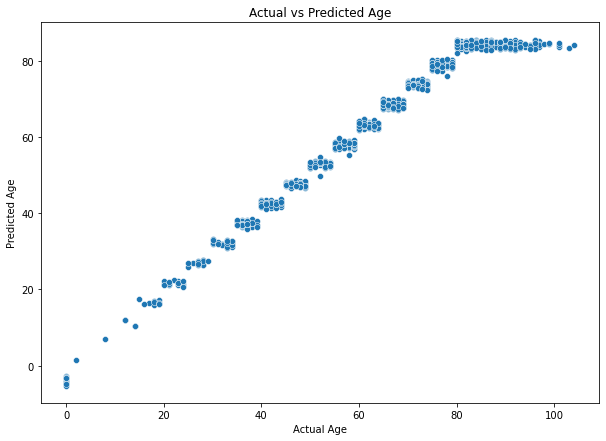

In [52]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Age')
plt.show()

O gráfico de dispersão mostra a relação entre a idade real (eixo x) e a idade prevista (eixo y) por um modelo de regressão linear. Os pontos representam as previsões do modelo para um conjunto de teste, após o treinamento com um conjunto de treinamento normalizado. A linha que parece formar um ângulo de 45 graus indica que o modelo está fazendo previsões razoavelmente próximas aos valores reais. No entanto, a presença de pontos afastados dessa linha sugere que há erros nas previsões para algumas idades.

## Conclusão
A **regressão linear** é uma técnica de modelagem que é usada quando a variável dependente é contínua. Ela tenta modelar a relação entre uma ou mais variáveis independentes (ou características) e uma variável dependente (ou alvo) através de uma linha reta (ou um hiperplano em múltiplas dimensões).

Por outro lado, a **regressão logística** é usada quando a variável dependente é categórica. Ela modela a probabilidade de uma determinada classe ou evento existir, como passar/falhar, ganhar/perder, vivo/morto, etc.

Se você está tentando prever uma variável contínua, como a idade de uma pessoa ou o preço de uma casa, a regressão linear seria uma escolha melhor. Se você está tentando prever uma variável categórica, como se um email é spam ou não, a regressão logística seria mais apropriada.